In [62]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import torch
import os
import sys
#sys.path.append("/home/prasad/pytorch-unet/")
from pre_process import Preprocessed_additional_data
from pre_process import Preprocessed_1day_data
from pre_process import read1day_data
import matplotlib as plt
from matplotlib.pyplot import imshow


In [64]:
from tensorflow import keras
model = keras.models.load_model("/home/prasad/convlstm/tuned_27_9_conv_h984_w3_9_additionald_2_loss_tr1224_v651.h5")
#model=model.load_weights("/home/prasad/convlstm/chckptvisaddweights1.hdf5")
#VIS MODELS


#chckptvisaddweights2.hdf5   # 5 wt
#chckptvisaddweights1.hdf5   # 4 wt
#vcheckpointvisadd.h5        # 3

#visconv_h984_w3_2extdtr_loss_345.h5  2
#visconv_h984_w3_1_loss_345.h5       1   ## FINAL


#TIR MODELS
#tuned_27_9_conv_h984_w3_9_additionald_2_loss_tr1224_v651.h5   1  602.13855 w=3 no ad    ### FINAL Mean=654.0341745330628,std= 104.64211547894843
#conv_h984_w3_9_additionald_2_loss_tr1224_v651.h5              2  644.6068  w=2 no ad2


#visconv_h984_w3_1_loss_345.h5
#conv_h984_norm_w5_8_loss_ 0_1398t_0_0828.h5    w=5  no8  886.1269     
#conv_h984_w6_7_loss_1588t_820v.h5              w=6  no7  828.2111
#conv_h984_w5_6_loss_1585t_818v.h5              w=5  no6  888.12665
#conv_h984_w4_5_loss_1274.h5                    w=4  no5  807.4869
#conv_h984_w3_4_loss_1443.h5                    w=3  no4  726.41455


#### Baseline mse (persistence) Model

In [22]:
dir_path='/home/prasad/pytorch-unet/INSAT3D_VIS_India/'

#dir_path='/home/prasad/pytorch-unet/INSAT3D_TIR1_India/'


X,y,verify=read1day_data(dir_path=dir_path,inp_seq_len=3,pred_frame=1,normalized_output='no')


In [61]:
def bmse_on1day(X,y,mean=0,std_dev=0):   #

    MSE=[]
    i=0
    for imgs in X:
        #inp=imgs
        latest=imgs[-1]
        latest=np.reshape(latest,(latest.shape[0],latest.shape[1]))           
        ground_truth=y[i]
        ground_truth=np.reshape(ground_truth,(ground_truth.shape[0],ground_truth.shape[1]))
        mse = ((latest-ground_truth)**2).mean()
        #print(inp.shape,pred.shape,output.shape,ground_truth.shape,mse)
        MSE.append(mse)

        i=i+1
    return MSE



##### TIR baseline mse

In [67]:
#tir_bmse_array=bmse_on1day(X,y) 
[915.9845, 950.3187, 1160.7401, 1144.3606, 1165.664, 1161.3351, 1347.2787, 1388.9855, 1305.1455, 1583.4497, 1425.6224, 
 1533.806, 1412.0234, 1522.2096, 1488.2871, 1520.1108, 1510.2615, 1585.6548, 1389.5242, 1264.7516, 1141.024, 1208.546, 
 1056.2722, 1108.1382, 1046.2537, 1183.739, 1140.4003, 1205.4856, 1111.8004, 1133.7607, 1236.2644, 999.67926, 975.7968, 
 1081.2587, 931.7631, 1020.4121]
#print(tir_bmse_array)   
#len(tir_bmse_array)

[915.9845, 950.3187, 1160.7401, 1144.3606, 1165.664, 1161.3351, 1347.2787, 1388.9855, 1305.1455, 1583.4497, 1425.6224, 1533.806, 1412.0234, 1522.2096, 1488.2871, 1520.1108, 1510.2615, 1585.6548, 1389.5242, 1264.7516, 1141.024, 1208.546, 1056.2722, 1108.1382, 1046.2537, 1183.739, 1140.4003, 1205.4856, 1111.8004, 1133.7607, 1236.2644, 999.67926, 975.7968, 1081.2587, 931.7631, 1020.4121]


##### VIS baseline mse

In [12]:
#vis_bmse_array=bmse_on1day(X,y)    
[468.8575, 598.53204, 790.58356, 969.23553, 1098.8923, 1311.247, 1405.9524, 1447.9839, 1611.856, 1686.538, 1718.8212,
 1757.1769, 1616.449, 1850.8038, 1578.8099, 1515.6066, 1246.5443, 985.46875, 769.22754, 469.41855, 277.7273, 125.54673, 
 45.545094, 15.316513, 3.252323, 2.8435876, 2.797083, 2.7995896, 3.8849242, 7.182833, 18.974054, 3.0296211, 2.6751401,
 2.6952772, 2.9315066, 8.921081]
#print(vis_bmse_array)

[468.8575, 598.53204, 790.58356, 969.23553, 1098.8923, 1311.247, 1405.9524, 1447.9839, 1611.856, 1686.538, 1718.8212, 1757.1769, 1616.449, 1850.8038, 1578.8099, 1515.6066, 1246.5443, 985.46875, 769.22754, 469.41855, 277.7273, 125.54673, 45.545094, 15.316513, 3.252323, 2.8435876, 2.797083, 2.7995896, 3.8849242, 7.182833, 18.974054, 3.0296211, 2.6751401, 2.6952772, 2.9315066, 8.921081]


#### MSE of the model on 1day data

In [74]:
#dir_path='/home/prasad/pytorch-unet/INSAT3D_VIS_India/'    #
dir_path='/home/prasad/pytorch-unet/INSAT3D_TIR1_India/'

X,y,maxx,minn,verify=Preprocessed_1day_data(dir_path,normalization_type='zscore',inp_seq_len=3,pred_frame=1,normalized_output='no',Mean=654.0341745330628,std= 104.64211547894843)


In [66]:
def mse_on1day(model,X,y,mean=0,std_dev=0,normalized_output='no'):   #
    MSE=[]
    i=0
    for imgs in X:
        inp=imgs
        inp= np.reshape(inp,(1,inp.shape[0],inp.shape[1],inp.shape[2],inp.shape[3]))
        pred= model.predict(inp)
        pred= np.reshape(pred, (pred.shape[0],pred.shape[1],pred.shape[2]))
        output=pred[0]
        if normalized_output=="yes":
            output = output*std_dev + mean  
            
        ground_truth=y[i]
        ground_truth=np.reshape(ground_truth,(ground_truth.shape[0],ground_truth.shape[1]))
        mse = ((output-ground_truth)**2).mean()
        #print(inp.shape,pred.shape,output.shape,ground_truth.shape,mse)
        MSE.append(mse)

        i=i+1
    return MSE

##### tir model mse 

In [13]:
tir_mse_2= mse_on1day(model,X,y)  #conv_h984_w3_9_additionald_2_loss_tr1224_v651.h5 2
print(tir_mse_2)


[549.7067, 539.55634, 650.1489, 616.8197, 667.28143, 691.78827, 803.0612, 810.4821, 814.2541, 978.6986, 955.66455, 942.08185, 875.04443, 925.67725, 902.442, 913.24994, 891.76556, 905.1928, 817.1704, 757.925, 682.20197, 721.33777, 651.4802, 662.9413, 654.80865, 721.3551, 697.4521, 710.8618, 700.3379, 748.79156, 770.0553, 651.1529, 598.73505, 672.3122, 660.3337, 632.58026]


In [10]:
tir_mse_1= mse_on1day(model,X,y)  #tuned_27_9_conv_h984_w3_9_additionald_2_loss_tr1224_v651.h5   1  602.13855 w=3 no ad
                                   ## FINAL
print(tir_mse_1)

[479.14206, 504.57483, 586.7171, 555.5737, 580.91095, 613.63446, 697.47845, 688.32086, 718.57544, 837.2484, 774.866, 795.33496, 755.92224, 791.83673, 770.3642, 754.92584, 729.2947, 746.4104, 688.2854, 640.0613, 582.83167, 603.1691, 553.3336, 567.9538, 565.3397, 602.35583, 579.9981, 625.3462, 597.6007, 624.58636, 658.0122, 574.0632, 545.2273, 634.9501, 595.22516, 586.3763]


In [68]:
tir_mse_1= mse_on1day(model,X,y)  #tuned_27_9_conv_h984_w3_9_additionald_2_loss_tr1224_v651.h5   1  602.13855 w=3 no ad
                                   ## FINAL
print(tir_mse_1)

[479.14206, 504.57483, 586.7171, 555.5737, 580.91095, 613.63446, 697.47845, 688.32086, 718.57544, 837.2484, 774.866, 795.33496, 755.92224, 791.83673, 770.3642, 754.92584, 729.2947, 746.4104, 688.2854, 640.0613, 582.83167, 603.1691, 553.3336, 567.9538, 565.3397, 602.35583, 579.9981, 625.3462, 597.6007, 624.58636, 658.0122, 574.0632, 545.2273, 634.9501, 595.22516, 586.3763]


##### vis model mse

In [17]:
vis_mse_3=mse_on1day(model,X,y)  # vcheckpointvisadd.h5 3
print(vis_mse_3)

[207538.33, 239539.73, 277154.38, 282946.62, 282587.6, 267625.2, 248513.2, 237084.12, 229878.5, 222622.31, 216263.98, 212694.8, 212505.38, 216640.44, 226491.95, 241949.53, 261550.6, 285483.0, 312593.38, 347928.62, 393190.25, 417401.22, 402722.75, 378807.72, 311107.34, 229790.39, 175947.47, 165911.8, 161396.11, 156196.25, 159545.78, 170515.88, 152645.5, 163653.36, 157461.42, 154632.34]


In [52]:
vis_mse_2=mse_on1day(model,X,y)  # visconv_h984_w3_2extdtr_loss_345.h5  2      
print(vis_mse_2)

[294.05573, 410.03326, 589.8213, 777.65753, 965.5785, 1105.3911, 1234.6005, 1348.671, 1416.4943, 1436.1436, 1370.0491, 
 1260.9678, 1125.3501, 1058.9163, 881.4052, 695.3974, 522.6016, 427.8241, 373.05838, 301.25018, 253.15948, 191.03629, 
 149.04541, 126.24353, 94.184814, 95.29304, 92.73136, 86.24189, 78.046005, 66.30815, 49.751335, 99.14214, 85.64999, 
 96.89171, 72.59252, 93.43442]

[294.05573, 410.03326, 589.8213, 777.65753, 965.5785, 1105.3911, 1234.6005, 1348.671, 1416.4943, 1436.1436, 1370.0491, 1260.9678, 1125.3501, 1058.9163, 881.4052, 695.3974, 522.6016, 427.8241, 373.05838, 301.25018, 253.15948, 191.03629, 149.04541, 126.24353, 94.184814, 95.29304, 92.73136, 86.24189, 78.046005, 66.30815, 49.751335, 99.14214, 85.64999, 96.89171, 72.59252, 93.43442]


In [69]:
vis_mse_1=mse_on1day(model,X,y)     #visconv_h984_w3_1_loss_345.h5  1     ## FINAL  
                  
[449.29514, 621.6222, 836.2679, 1048.8015, 1263.7893, 1398.4438, 1537.8429, 1678.0725, 1749.5332, 1754.2477, 1641.3884,
 1488.946, 1311.8076, 1205.5815, 987.25494, 718.0847, 500.7884, 334.7693, 215.69487, 126.03116, 75.85275, 32.869514, 
 12.674273, 5.0171967, 3.0881302, 2.545144, 2.6136253, 3.1254084, 4.810268, 8.584832, 21.18128, 2.2066512, 3.0286674, 
 2.0715733, 5.0379763, 8.672766]

print(vis_mse_1) 

[479.14206, 504.57483, 586.7171, 555.5737, 580.91095, 613.63446, 697.47845, 688.32086, 718.57544, 837.2484, 774.866, 795.33496, 755.92224, 791.83673, 770.3642, 754.92584, 729.2947, 746.4104, 688.2854, 640.0613, 582.83167, 603.1691, 553.3336, 567.9538, 565.3397, 602.35583, 579.9981, 625.3462, 597.6007, 624.58636, 658.0122, 574.0632, 545.2273, 634.9501, 595.22516, 586.3763]


#### Prediction

In [18]:
def prediction_for_target(model,verify,target_img='3DIMG_07NOV2019_0330_L1C_SGP_vis.tif'):
    target=[]
    for i in range(len(verify)):
        Target=verify[i][-1]
        target.append(Target)
    target=np.array(target)

    target_index=np.where(target==target_img)
    inp=X[target_index]
    inp=np.reshape(inp,(1,inp.shape[0],inp.shape[1],inp.shape[2],inp.shape[3]))
    pred =model.predict(inp)
    pred= np.reshape(pred, (pred.shape[0],pred.shape[1],pred.shape[2]))
    output=pred[0]
    plt.imshow(output)
    return(output)


In [43]:
def prediction(input_seq_list,model):
    inp=input_seq_list
    # inp should have shape (length of seq, height,width)
    inp=np.reshape(inp,(1,inp.shape[0],inp.shape[1],inp.shape[2],1))
    pred =model.predict(inp)
    pred= np.reshape(pred, (pred.shape[0],pred.shape[1],pred.shape[2]))
    output=pred[0]
    return(output)

#imshow(output,cmap='gray')

In [70]:
#dir_path='/home/prasad/pytorch-unet/INSAT3D_VIS_India/'

dir_path='/home/prasad/pytorch-unet/INSAT3D_TIR1_India/'


X,y,verify=read1day_data(dir_path=dir_path,inp_seq_len=3,pred_frame=1,normalized_output='no')

predicted_names=[]
for imgs in verify:
    name=imgs[-1]
    name= 'predicted_'+name
    predicted_names.append(name)


In [75]:
def predicted1_day(X,model,predicted_names,storing_path):
    predicted=[]
    for i in range(len(X)):
        pred=prediction(X[i],model)
        predicted.append(pred)
        if i%5==0 and i>0:
            print("predicted",i,"th image out of ",len(X))
        Image.fromarray(pred).save( storing_path+predicted_names[i])
    return(predicted)
        
    

In [78]:
pred=predicted1_day(X,model,predicted_names,storing_path='/home/prasad/git/conv_lstm/TIR_predictions/')

predicted 5 th image out of  36
predicted 10 th image out of  36
predicted 15 th image out of  36
predicted 20 th image out of  36
predicted 25 th image out of  36
predicted 30 th image out of  36
predicted 35 th image out of  36


In [79]:
dir_path='/home/prasad/git/conv_lstm/TIR_predictions/'

files_list=os.listdir(dir_path)
files_list= sorted(files_list)

check_pred=[]
for i in range(len(files_list)):
    img = np.array(Image.open(os.path.join(dir_path,files_list[i]) ))
    check_pred.append(img)
    

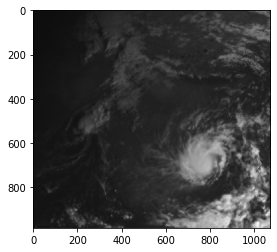

In [29]:
output=prediction(X[2],model)
